# Random Line Generator
### Using the ρ = x cos θ + y sin θ parametrization

Inspiration for the line generation from [here](https://www.apress.com/gp/blog/all-blog-posts/drawing-random-lines-in-python/16975626).
Noise is being added by [skimage.draw.bezier_curve](https://scikit-image.org/docs/stable/api/skimage.draw.html#bezier-curve).

In [111]:
import random
import numpy as np
from skimage import draw
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2

In [112]:
def random_coords(width, height):
    return int(random.random() * width), int(random.random() * height)

In [113]:
# the hough line parametrization:
# ρ = x cos θ + y sin θ
# where:
# ρ (rho) = distance from origin to the line. [-max_dist to max_dist]. max_dist is the diagonal length of the image. 
# θ = angle from origin to the line. [-90° to 90°]

def draw_random_lines(numLines, image, dims):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, 0.1))
    width, height = dims
    diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, int(diag_len * 2.0), endpoint=False)

    for i in range(numLines):
        # random theta ando rho values
        theta = np.random.uniform(-np.pi/2, np.pi/2)
        rho = np.random.uniform(-diag_len, diag_len)
        print("theta = {:.2f}, rho = {:.2f}".format(theta, rho))  
        
        # calculate the x,y coordinates of the line and draw it on the image
        x0 = rho * np.cos(theta)
        y0 = rho * np.sin(theta)
        x1 = int(x0 + 1000 * (-np.sin(theta)))
        y1 = int(y0 + 1000 * (np.cos(theta)))
        x2 = int(x0 - 1000 * (-np.sin(theta)))
        y2 = int(y0 - 1000 * (np.cos(theta)))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)
        print("x0 = {:.2f}, y0 = {:.2f}, x1 = {:.2f}, y1 = {:.2f}, x2 = {:.2f}, y2 = {:.2f}".format(x0, y0, x1, y1, x2, y2))  

    return image

In [114]:
#def draw_bezier_noise(numNoise, image, dims):
    #for _ in range(numNoise):
        #r0, c0 = random_coords(dims[0], dims[1])
        #r1, c1 = random_coords(dims[0], dims[1])
        #r2, c2 = random_coords(dims[0], dims[1])
        #image[draw.bezier_curve(r0,c0,r1,c1,r2,c2, 0.5)] = 255
    #return image

theta = -0.50, rho = -47.94
x0 = -42.01, y0 = 23.10, x1 = 439.00, y1 = 899.00, x2 = -523.00, y2 = -853.00
theta = 1.49, rho = 24.48
x0 = 1.91, y0 = 24.41, x1 = -995.00, y1 = 102.00, x2 = 998.00, y2 = -53.00
theta = 1.33, rho = -17.10
x0 = -4.00, y0 = -16.63, x1 = -976.00, y1 = 216.00, x2 = 968.00, y2 = -250.00


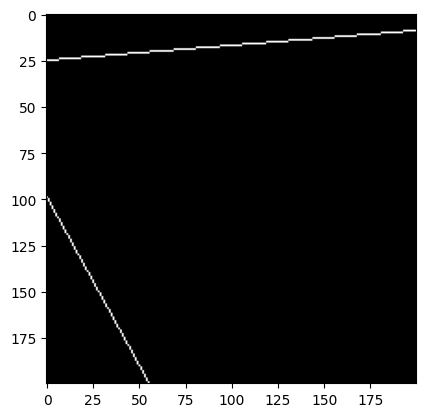

In [115]:
# Constructing random test image
image = np.zeros((200, 200))
image = draw_random_lines(3, image, [200, 200])
#image = draw_bezier_noise(2, image, [200, 200])
plt.imshow(image, cmap=cm.gray)